In [51]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [52]:
file_path = 'dataset/filtered_train_14_15.csv'

In [53]:
df = pd.read_csv(file_path)
n_clusters = 24

In [54]:
# Select only the relevant columns
coordinates_df = df[['pickup_longitude', 'pickup_latitude']]
# Use KMeans clustering with k=100 to identify locations
kmeans_pickup = KMeans(n_clusters=n_clusters, random_state=42)
df['location_pickup'] = kmeans_pickup.fit_predict(coordinates_df)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [55]:
centroids_pickup = kmeans_pickup.cluster_centers_

# Get the labels assigned to each data point during clustering
labels_pickup = kmeans_pickup.labels_

# Initialize an empty dictionary to store clusters
clusters_pickup = {}

# Iterate over each centroid and its corresponding label
for idx, centroid in enumerate(centroids_pickup):
    label = idx  # Cluster label corresponds to centroid index
    # Find indices of data points assigned to this cluster
    cluster_indices = np.where(labels_pickup == label)[0]
    # Store cluster label and indices in the dictionary
    clusters_pickup[label] = cluster_indices
#clusters_pickup

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


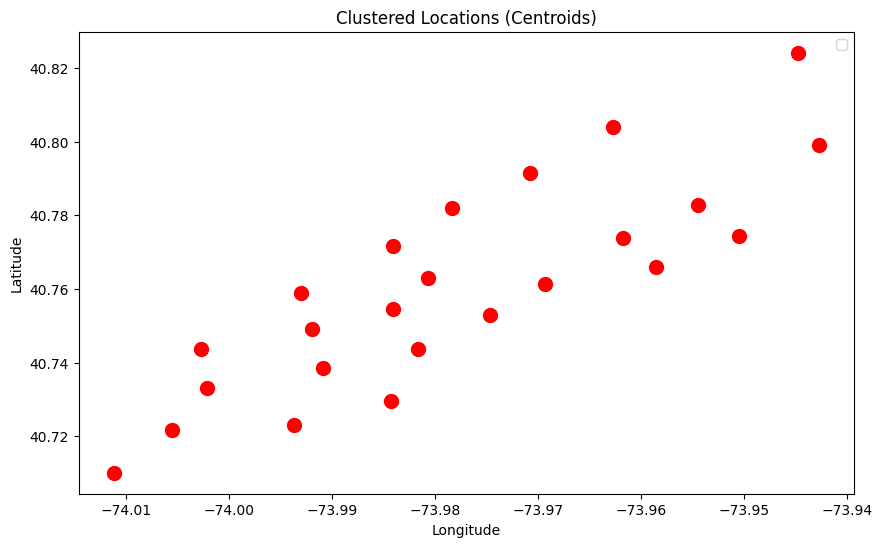

In [56]:
# Display information or perform further analysis on each location as needed
#for location_id in range(100):
#    location_subset = df[df['location'] == location_id]
#    print(f"Location {location_id} Subset:")
#    print(location_subset.head())
centroids_pickpup = kmeans_pickup.cluster_centers_

# Plot the clustered locations (centroids)
plt.figure(figsize=(10, 6))
plt.scatter(centroids_pickpup[:, 0], centroids_pickpup[:, 1], marker='o', s=100, c='red')
plt.title('Clustered Locations (Centroids)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [57]:
# Select only the relevant columns
coordinates_df = df[['dropoff_longitude', 'dropoff_latitude']]
# Use KMeans clustering with k=100 to identify locations
kmeans_dropoff = KMeans(n_clusters=n_clusters, random_state=42)
df['location_dropoff'] = kmeans_dropoff.fit_predict(coordinates_df) + n_clusters


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [58]:
centroids_dropoff = kmeans_dropoff.cluster_centers_

# Get the labels assigned to each data point during clustering
labels_dropoff = kmeans_dropoff.labels_+n_clusters

# Initialize an empty dictionary to store clusters
clusters_dropoff = {}

# Iterate over each centroid and its corresponding label
for idx, centroid in enumerate(centroids_dropoff):
    label = idx + n_clusters # Cluster label corresponds to centroid index
    # Find indices of data points assigned to this cluster
    cluster_indices = np.where(labels_dropoff == label)[0]
    # Store cluster label and indices in the dictionary
    clusters_dropoff[label] = cluster_indices
#clusters_dropoff

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


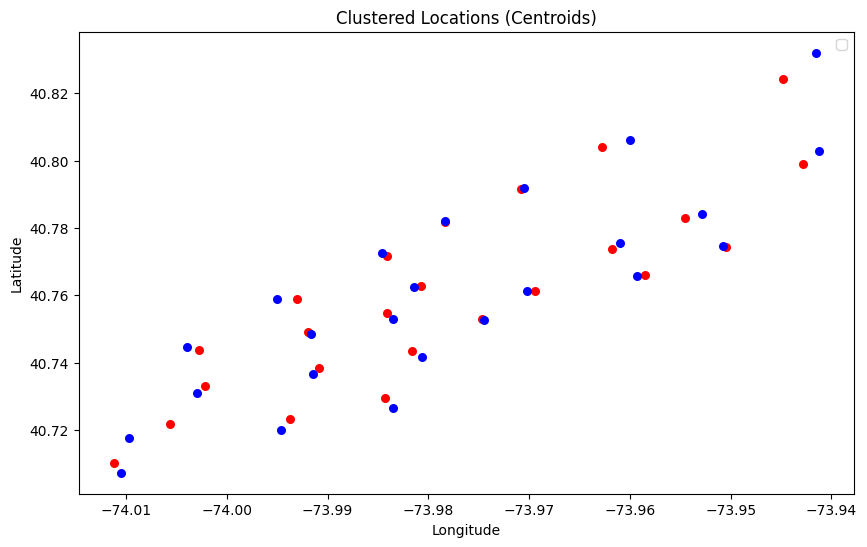

In [59]:
# Display information or perform further analysis on each location as needed
#for location_id in range(100):
#    location_subset = df[df['location'] == location_id]
#    print(f"Location {location_id} Subset:")
#    print(location_subset.head())
centroids_dropoff = kmeans_dropoff.cluster_centers_

# Plot the clustered locations (centroids)
plt.figure(figsize=(10, 6))
plt.scatter(centroids_pickpup[:, 0], centroids_pickpup[:, 1], marker='o', s=30, c='red')
plt.scatter(centroids_dropoff[:, 0], centroids_dropoff[:, 1], marker='o', s=30, c='blue')
plt.title('Clustered Locations (Centroids)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [60]:
#Create arrays to store pickups
picked_up_pickup_indices = []
picked_up_dropoff_indices = []
radius = 0.0024

# Create arrays to store pickups
picked_up_indices = []
closest_pickup_indices = []  # Store indices of closest pickup point for each picked up dropoff centroid

# Iterate through each dropoff centroid
for dropoff_index, dropoff_centroid in enumerate(centroids_dropoff):
    # Assume initially it's a dropoff
    is_pickup = False
    closest_pickup_index = None  # Store the index of the closest pickup point
    min_distance = float('inf')  # Initialize minimum distance to infinity
    # Iterate through each pickup centroid
    for pickup_index, pickup_centroid in enumerate(centroids_pickpup):
        # Calculate the Euclidean distance between the centroids
        distance = np.linalg.norm(pickup_centroid - dropoff_centroid)
        # If the distance is within the radius to any pickup centroid, classify as pickup
        if distance <= radius:
            is_pickup = True
            if distance < min_distance:  # If this pickup is closer than the previous closest one
                min_distance = distance
                closest_pickup_index = pickup_index
    # If it's within the radius of any pickup, classify as pickup, else keep it as a dropoff
    if is_pickup:
        picked_up_indices.append(dropoff_index)
        closest_pickup_indices.append(closest_pickup_index)

# Convert to numpy array
picked_up_indices = np.array(picked_up_indices)
closest_pickup_indices = np.array(closest_pickup_indices)



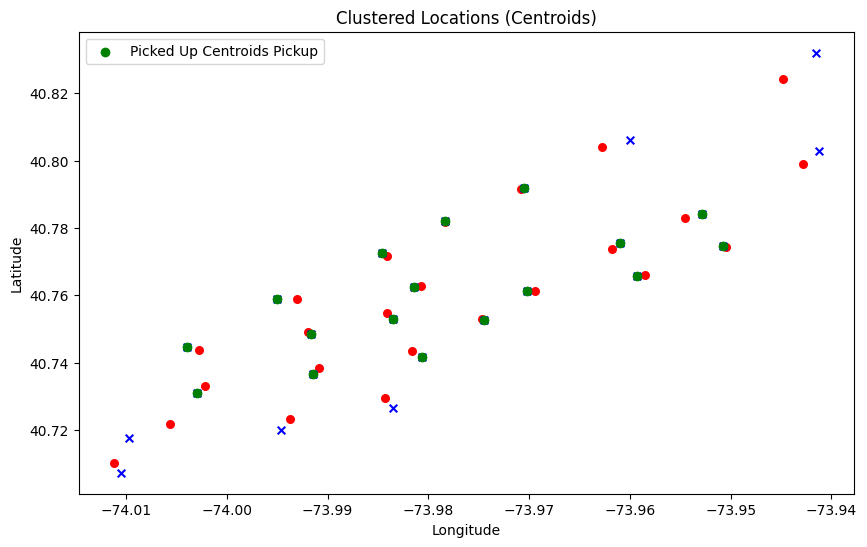

In [61]:
# Plot the clustered locations (centroids)
plt.figure(figsize=(10, 6))

plt.scatter(centroids_pickpup[:, 0], centroids_pickpup[:, 1], marker='o', s=30, c='red')
plt.scatter(centroids_dropoff[:, 0], centroids_dropoff[:, 1], marker='x', s=30, c='blue')
plt.scatter(centroids_dropoff[picked_up_indices, 0], 
            centroids_dropoff[picked_up_indices, 1], 
            color='green', label='Picked Up Centroids Pickup')
plt.title('Clustered Locations (Centroids)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [62]:
centroids_dropoff_filtered = np.delete(centroids_dropoff, picked_up_indices, axis=0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


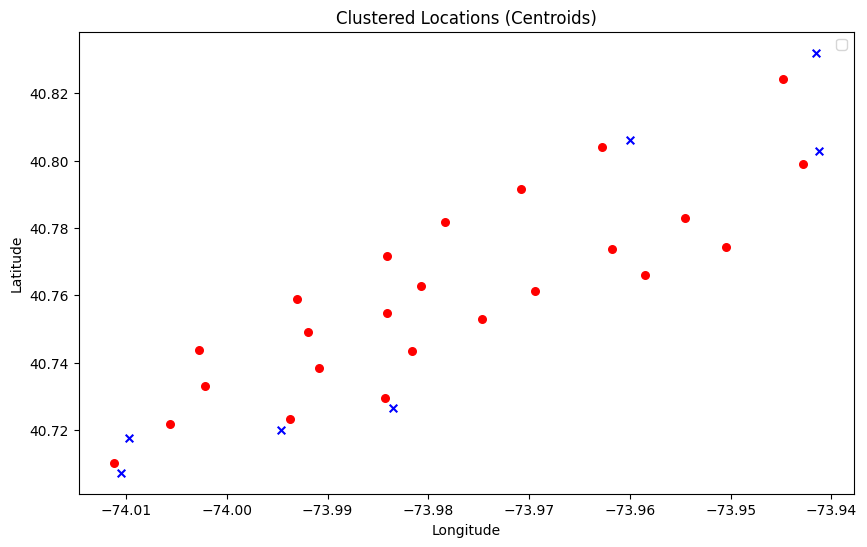

In [63]:
# Plot the clustered locations (centroids)
plt.figure(figsize=(10, 6))

plt.scatter(centroids_pickpup[:, 0], centroids_pickpup[:, 1], marker='o', s=30, c='red')
plt.scatter(centroids_dropoff_filtered[:,0], centroids_dropoff_filtered[:,1], marker='x', s=30, c='blue')
plt.title('Clustered Locations (Centroids)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [64]:
picked_up_indices

array([ 0,  1,  2,  3,  4,  6,  8,  9, 10, 11, 12, 13, 17, 18, 19, 21, 23])

In [65]:
closest_pickup_indices

array([16,  5, 20, 13,  4, 15, 17, 22,  1, 12,  0,  9,  7,  8,  6,  3, 23])

In [66]:
for i, idx in enumerate(picked_up_indices):
    print(n_clusters+idx, closest_pickup_indices[i])
    #print(centroids_dropoff[idx])
    df.loc[df['location_dropoff'] == idx + n_clusters, 'location_dropoff'] = closest_pickup_indices[i]

24 16
25 5
26 20
27 13
28 4
30 15
32 17
33 22
34 1
35 12
36 0
37 9
41 7
42 8
43 6
45 3
47 23


In [67]:
np.unique(df['location_dropoff'])

array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 12, 13, 15, 16, 17, 20, 22, 23,
       29, 31, 38, 39, 40, 44, 46], dtype=int32)

In [68]:
df.to_csv("dataset/filtered_train_14_15_w_location.csv")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


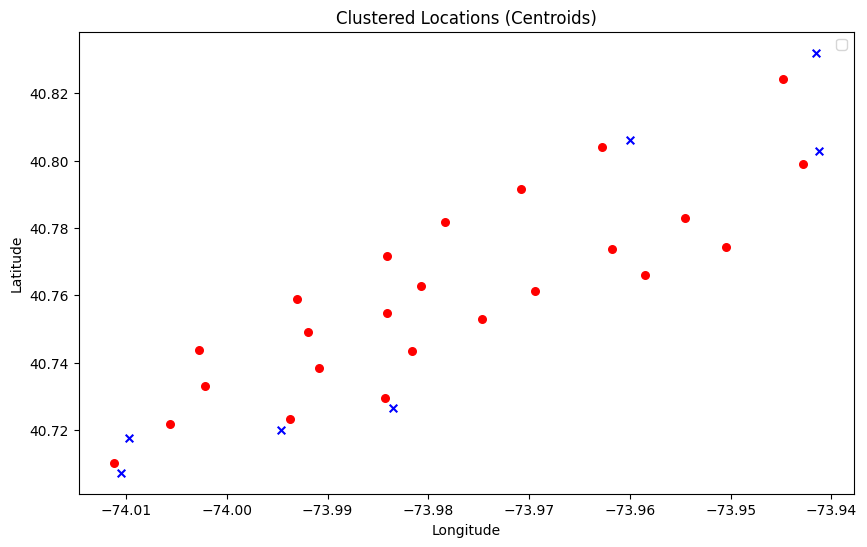

In [69]:
# Plot the clustered locations (centroids)
plt.figure(figsize=(10, 6))

plt.scatter(centroids_pickpup[:, 0], centroids_pickpup[:, 1], marker='o', s=30, c='red')
plt.scatter(centroids_dropoff_filtered[:,0], centroids_dropoff_filtered[:,1], marker='x', s=30, c='blue')
plt.title('Clustered Locations (Centroids)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [70]:
total_points = np.concatenate([centroids_pickpup, centroids_dropoff_filtered])

In [71]:
total_points

array([[-73.96173652,  40.7737422 ],
       [-73.99088073,  40.73847411],
       [-73.99368033,  40.72307859],
       [-73.98407716,  40.75466561],
       [-73.97081469,  40.79150921],
       [-73.95449839,  40.78281562],
       [-73.99306471,  40.75886636],
       [-73.97834581,  40.78185753],
       [-74.00276044,  40.74378791],
       [-73.96938979,  40.76122502],
       [-74.01118487,  40.71011213],
       [-73.94481502,  40.82414722],
       [-73.9841141 ,  40.77166588],
       [-73.98075289,  40.76285229],
       [-73.98433667,  40.72956053],
       [-73.95853966,  40.76589611],
       [-73.98165161,  40.74357013],
       [-73.99195113,  40.74919753],
       [-74.00559948,  40.72167498],
       [-73.96274452,  40.80409181],
       [-74.00220455,  40.73307696],
       [-73.94279301,  40.79896974],
       [-73.9746793 ,  40.7528874 ],
       [-73.95050853,  40.77445332],
       [-73.959978  ,  40.80614252],
       [-74.01048527,  40.70726176],
       [-73.94128132,  40.80298304],
 

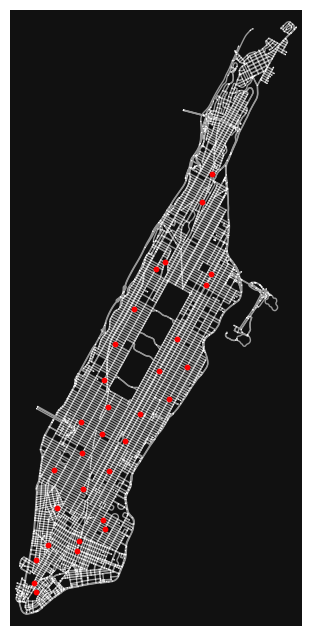

In [72]:
import osmnx as ox

# Retrieve the street network for Manhattan
graph = ox.graph_from_place("Manhattan, New York, USA", network_type="drive")

# Specify latitude and longitude coordinates
latitude = 40.7128  # Latitude of the location (e.g., New York City)
longitude = -74.0060  # Longitude of the location (e.g., New York City)
fig, ax = ox.plot_graph(graph, node_size=1, show=False, close=False)
for longitude, latitude in total_points:
    # Find the nearest node in the graph to the specified coordinates
    nearest_node = ox.distance.nearest_nodes(graph, longitude, latitude)
    ax.scatter(graph.nodes[nearest_node]['x'], graph.nodes[nearest_node]['y'], color='r', s=10)
plt.show()


In [73]:

nearest_nodes = []
# Iterate over each point and find the nearest node in the graph
for latitude, longitude in total_points:
    nearest_node = ox.distance.nearest_nodes(graph, latitude, longitude)
    nearest_nodes.append(nearest_node)



# Initialize a list to store the routes
routes = []

# Calculate the routes between consecutive pairs of nearest nodes
for i in range(len(nearest_nodes) - 1):
    start_node = nearest_nodes[i]
    end_node = nearest_nodes[i + 1]
    route = ox.shortest_path(graph, start_node, end_node)
    routes.append(route)


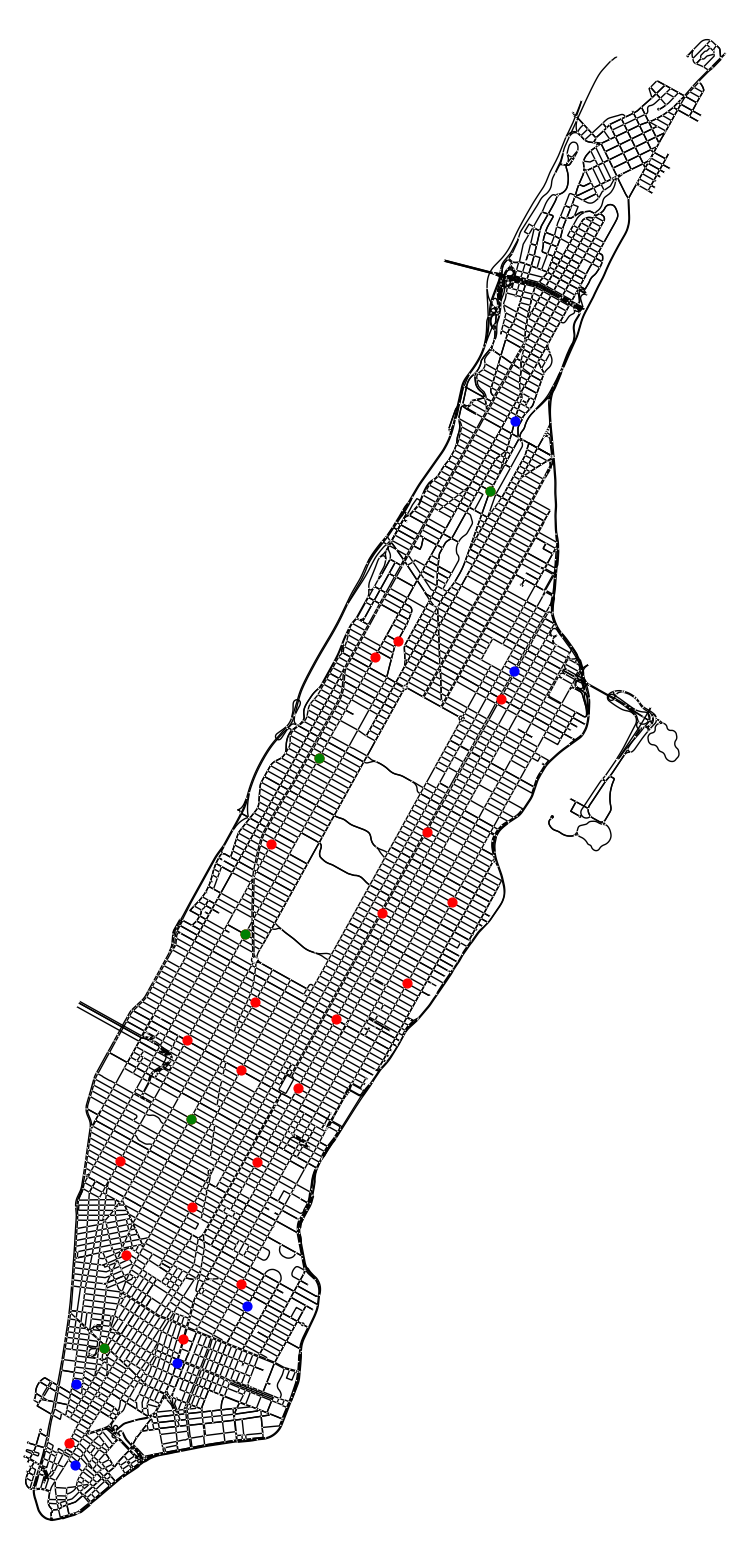

In [74]:
# Plot the street network with the calculated routes
fig, ax = ox.plot_graph(graph, node_size=1, show=False, close=False, figsize=(20,20), dpi=300,bgcolor='white', edge_color='black', save=True, filepath='image.png')
color = 'r'
for idx,(longitude, latitude) in enumerate(total_points):
    if idx >len(centroids_pickpup):
        color = 'b'
    # Find the nearest node in the graph to the specified coordinates
    nearest_node = ox.distance.nearest_nodes(graph, longitude, latitude)
    ax.scatter(graph.nodes[nearest_node]['x'], graph.nodes[nearest_node]['y'], color=color, s=40, alpha = 1)

# Extract latitude and longitude coordinates
latitudes = [point[1] for point in total_points]
longitudes = [point[0] for point in total_points]

# Find the range of latitude and longitude coordinates
lat_min, lat_max = min(latitudes), max(latitudes)
lon_min, lon_max = min(longitudes), max(longitudes)

# Divide the latitude and longitude range into 5 segments
lat_segments = np.linspace(lat_min, lat_max, num=6)
lon_segments = np.linspace(lon_min, lon_max, num=6)

# Find the middle point within each segment
contracted_points = []
for i in range(5):
    lat_middle = (lat_segments[i] + lat_segments[i+1]) / 2
    
    lon_middle = (lon_segments[i] + lon_segments[i+1]) / 2
    # Find the closest original point to this middle point
    closest_point_idx = np.argmin(np.linalg.norm(np.array(total_points) - [lon_middle, lat_middle], axis=1))
    closest_point = total_points[closest_point_idx]
    contracted_points.append(closest_point)
depots = []
for idx,(longitude, latitude) in enumerate(contracted_points):
    # Find the nearest node in the graph to the specified coordinates
    nearest_node = ox.distance.nearest_nodes(graph, longitude, latitude)
    depots += [nearest_node]
    ax.scatter(graph.nodes[nearest_node]['x'], graph.nodes[nearest_node]['y'], color="g", s=40, alpha = 1)


#fig.dpi = 300
#fig.set_figheight(20)
#fig.set_figwidth(20)
fig.savefig("a.png",dpi=300, bbox_inches='tight')
#fig.show()

In [75]:
nearest_nodes2 = []
# Iterate over each point and find the nearest node in the graph
for latitude, longitude in  sorted(list(total_points)+list(contracted_points), key=lambda point: point[1]):
    nearest_node = ox.distance.nearest_nodes(graph, latitude, longitude)
    nearest_nodes2.append(nearest_node)

In [76]:
sorted_nodes = nearest_nodes
len(sorted_nodes)  

31

In [77]:
# Connect the first few nodes
num_nodes_to_connect = 5  # Adjust this value as needed

routes2 = []
for i in range(len(sorted_nodes)):
    for ii in range(1, num_nodes_to_connect):
        start_node = sorted_nodes[i]
        idx = (i + ii) % len(sorted_nodes)  # Use modulo to wrap around to 0 when reaching the end
        end_node = sorted_nodes[idx]
        route = ox.shortest_path(graph, start_node, end_node)
        
        routes2.append(route)

In [78]:
plt.close()
fig, ax = ox.plot_graph_routes(graph, routes2, route_colors='orange', route_linewidth=1, node_size=1, figsize=(20,20), dpi=300,bgcolor='white', edge_color='black', save=True, filepath='image_roads.png', node_color = "r", ax = ax, show = False)

In [79]:
import networkx as nx

# Initialize a new NetworkX graph
graph_from_routes = nx.DiGraph()

# Add nodes from the list of nearest nodes
for node in nearest_nodes:
    graph_from_routes.add_node(node, depot = False)

for node in depots:
    graph_from_routes.add_node(node, depot = True)
# Add edges from the list of routes
# Sort routes in ascending order


for route in routes2:
        start_node = route[0]
        end_node = route[-1]
        route_length = ox.utils_graph.get_route_edge_attributes(graph, route, 'length')[0]
        
        # Add the new segment to the graph
        graph_from_routes.add_edge(start_node, end_node, weight=route_length)



/var/folders/b6/t14lv28n5xqdhgq7zcrqwfkm0000gn/T/ipykernel_66846/3349207455.py:19: FutureWarning: The `get_route_edge_attributes` function has been deprecated and will be removed in the v2.0.0 release. Use the `route_to_gdf` function instead.
  route_length = ox.utils_graph.get_route_edge_attributes(graph, route, 'length')[0]


In [80]:
for i, node in enumerate(graph_from_routes.nodes()):
    graph.nodes[node]['id'] = i
    if node in depots:
        graph.nodes[node]['depot'] = True
    else:
        graph.nodes[node]['depot'] = False
    print(node)

42454691
42429657
42432082
42430333
42442514
42456578
42437368
42438862
42444916
42432847
42438155
42432963
1241742563
42440012
42454994
42431684
8482948064
42435422
42438781
42437222
42451987
42458342
42446977
42448254
1506445821
42429838
596776613
42432990
42434148
42430521
1773076513


In [81]:
for i, data in graph_from_routes.nodes(data=True):
    print(i, data)

42454691 {'depot': False}
42429657 {'depot': False}
42432082 {'depot': False}
42430333 {'depot': False}
42442514 {'depot': True}
42456578 {'depot': False}
42437368 {'depot': False}
42438862 {'depot': False}
42444916 {'depot': False}
42432847 {'depot': False}
42438155 {'depot': False}
42432963 {'depot': True}
1241742563 {'depot': True}
42440012 {'depot': False}
42454994 {'depot': False}
42431684 {'depot': False}
8482948064 {'depot': False}
42435422 {'depot': True}
42438781 {'depot': True}
42437222 {'depot': False}
42451987 {'depot': False}
42458342 {'depot': False}
42446977 {'depot': False}
42448254 {'depot': False}
1506445821 {'depot': False}
42429838 {'depot': False}
596776613 {'depot': False}
42432990 {'depot': False}
42434148 {'depot': False}
42430521 {'depot': False}
1773076513 {'depot': False}


In [82]:
nx.write_gpickle(graph_from_routes, "graph_from_routes_wd.pkl")

In [83]:
pp_to_nn = {}
dp_to_nn = {}
a = []
for idx,point in enumerate(total_points):
    index = np.where(np.all(centroids_pickpup == point, axis=1))[0]
    if len(index)==0:
        index = np.where(np.all(centroids_dropoff == point, axis=1))[0]
        dp_to_nn[index[0] + n_clusters] = nearest_nodes[idx]
    else:
        pp_to_nn[index[0]] = nearest_nodes[idx]

In [84]:
pp_to_nn.items()

dict_items([(0, 42454691), (1, 42429657), (2, 42432082), (3, 42430333), (4, 42442514), (5, 42456578), (6, 42437368), (7, 42438862), (8, 42444916), (9, 42432847), (10, 42438155), (11, 42432963), (12, 1241742563), (13, 42440012), (14, 42454994), (15, 42431684), (16, 8482948064), (17, 42435422), (18, 42438781), (19, 42437222), (20, 42451987), (21, 42458342), (22, 42446977), (23, 42448254)])

In [85]:
dp_to_nn.items()

dict_items([(29, 1506445821), (31, 42429838), (38, 596776613), (39, 42432990), (40, 42434148), (44, 42430521), (46, 1773076513)])

In [86]:
dict = pp_to_nn.copy()
dict.update(dp_to_nn)


In [87]:
df["pickup_graph_node"] = df["location_pickup"].map(dict)
df["dropoff_graph_node"] = df["location_dropoff"].map(dict)

In [88]:
df.isna().sum()

Unnamed: 0            0
id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
pickup_date           0
location_pickup       0
location_dropoff      0
pickup_graph_node     0
dropoff_graph_node    0
dtype: int64

In [89]:
df.to_csv("dataset/finished_dataset.csv")